# **Análisis de reservas en un negocio de hoteles**

### **Primera entrega Proyecto final de data science para CoderHouse**

### **Nicolás Isoler**

Una importante empresa de hoteles del país está revisando sus costos comerciales. Analizando los contratos detectan que poseen un acuerdo con la agencia de marketing que les ayuda a traer clientes potenciales al hotel.

Según lo acordado, se le paga un costo fijo mensual pequeño por el servicio, pero la mayoría es un costo variable atado a las reservas de USD 1,50 por cada reserva realizada. Se les paga contra resultado; es decir, si traen un cliente potencial que no hace una reserva, entonces no hay que pagarles el improte variable. Solo se les paga cuando esos clientes potenciales que traen realmente hacen una reserva en el hotel.

El problema surge cuando se dan cuenta que el costo variable debe ser abonado independientemente que la reserva sea cancelada o se haga efectiva la visita (ya que los clientes sólo pagan cuando llegan al hotel, no al momento de hacer su reserva).

Además, cuando alguien cancela con menos de 3 días de anticipación el costo es de alrededor de USD 120,00 adicionales.

# **Preguntas e hipótesis de interés**
-  ¿Cuánto es la tasa de cancelación de reservas?
-  ¿Cuáles son las reservas con mayor riesgo de cancelación?
-  Las reservas que se hacen con mayor anticipación tienen mucho riesgo de cancelarse.
-  Las reservas que incluyen hijos tienen menor riesgo.
-  Los usuarios que realizaron algún cambio en su reserva tienen menor riesgo.
-  Cuando el usuario ha realizado una solicitud especial el riesgo es menor.
-  Las reservas que tienen un “adr” bajo el riesgo es menor.



Columna"Tipo de Hotel" hace referencia a la clase de hotel consultado, Resort o Ciudad
Reserva cancelada se refiere a si el cliente canceló la reserva, admitiendo como respuesta "Sí" o "No"
Días transcurridos se refiere a los días transcurridos desde la reserva hasta la fecha de llegada al hotel
Mes de la fecha de llegada hace mención al mes de arribo al hotel
Número de semana del año de la fecha de llegada se refiere a la semana del año de la fecha de arribo
Número de noches de fin de semana (sábado o domingo) refiere a Sábados o Domingos que el huésped se alojó o reservó para quedarse en el hotel
Número de noches de la semana (de lunes a viernes) quiere decir las noches de Lunes a Viernes que el huésped se hospedó o reservó para quedarse en el hotel


In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df= pd.read_excel('DatasetReservasHotel.xlsx')

In [9]:
df

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,C,3,Sin depósito,0,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,...,C,4,Sin depósito,0,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,C,0,Sin depósito,0,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,A,0,No reembolsable,304,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,A,0,Reembolsable,240,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,No,23,2017,August,35,30,2,5,2,...,A,0,No reembolsable,394,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,No,102,2017,August,35,31,2,5,3,...,E,0,Reembolsable,9,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,No,34,2017,August,35,31,2,5,2,...,D,0,Reembolsable,9,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,No,109,2017,August,35,31,2,5,2,...,A,0,No reembolsable,89,0,Transient,104.40,0,0,Check-Out


Veamos el encabezado del dataframe para ver cómo son las catacterísticas que incluye.

In [10]:
df.head(0)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva


### **Descripción de cada columna**

**Tipo de Hotel:** hace referencia a la clase de hotel consultado, Resort o Ciudad.

**Reserva cancelada:** se refiere a si el cliente canceló la reserva, admitiendo como respuesta "Sí" o "No".

**Días transcurridos:** se refiere a los días transcurridos desde la reserva hasta la fecha de llegada al hotel.

**Año de llegada:** se al año de arribo al hotel.

**Mes de llegada:** hace mención al mes de arribo al hotel.

**Número de semana del año de llegada:** se refiere a la semana del año de la fecha de arribo.

**Día de llegada:** hace mención al día de arribo al hotel.

**Número de noches de fin de semana:** refiere a Sábados o Domingos que el huésped se alojó o reservó para quedarse en el hotel.

**Número de noches de la semana:** quiere decir las noches de Lunes a Viernes que el huésped se hospedó o reservó para quedarse en el hotel.

**Adultos:** número de adultos de la visita.

**Niños:** número de niños de la visita.

**Bebés:** número de bebés de la visita.

**Comida:** tipo de comida reservada, Bed and Breakfast (BB), Half Board (HB), Full Board (FB), Undifined.

**País de origen:** país de residendia del cliente de la reserva.

**Segmento de mercado:** designación del segmento de mercado. El término "TA" : Agentes de viajes y "TO" : Operadores turísticos.

**Canal de distribución:** canal de distribución de reservas.

**Cliente habitual:** El nombre de la reserva era de un huésped repetido (1) / No era un huésped repetido (0)

**Cancelación previa:** número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.

**Reservas previas no canceladas:** número de reservas anteriores no canceladas por el cliente antes de la reserva actual.

**Código del tipo de habitación:** código del tipo de habitación reservada.

**Código del tipo de habitación asignado:** código del tipo de habitación asignado a la reserva.

**Número de cambios en la reserva:** número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva hasta la entrada.

**Tipo de garantía:** indicación de si el cliente hizo un depósito para garantizar la reserva. Sin depósito: no se realizó ningún depósito; No reembolsable: se realizó un depósito por el valor del coste total de la estancia; Reembolsable: se realizó un depósito por un valor inferior al coste total de la estancia.

**Importe de la reserva:** importe del depósito de garantía.

**ID de la entidad de reserva:** número de indentificación de la agencia de viajes que hizo la reserva.

**Tipo de reserva:** tipo de reserva, asumiendo una de las cuatro categorías: Contract - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato; Group - cuando la reserva está asociada a un grupo; Transient - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria; Transient-party - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.

**Días antes de confirmar:** número de días que la reserva estuvo en la lista de espera antes de ser confirmada al cliente.

**Número de plazas de aparcamiento:** número de plazas de aparcamiento que necesita el cliente.

**Número de peticiones:** número de peticiones especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).

**Estado de la reserva:** estado de la última reserva, asumiendo una de las tres categorías: Canceled - la reserva fue cancelada por el cliente; Check-Out - el cliente se ha registrado pero ya se ha marchado; No-Show - el cliente no se ha registrado y ha informado al hotel del motivo.

## **DATA WRANGLING**

Para comenzar el análisis de los datos vamos a ver la estructura del dataset de manera de entender la cantidad de datos, la clase de variables con las que vamos a trabajar, la existencia de valores nulos o duplicados.

In [11]:
df.shape

(119390, 30)

El dataset obtenido posee 119.390 filas y 30 columnas.

Analizamos el dataframe para ver si existen datos erróneos o nulos. Miramos la información general del dataframe.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Tipo de Hotel                           119390 non-null  object 
 1   Reserva cancelada                       119390 non-null  object 
 2   Días transcurridos                      119390 non-null  int64  
 3   Año de llegada                          119390 non-null  int64  
 4   Mes de llegada                          119390 non-null  object 
 5   Número de semana del año de llegada     119390 non-null  int64  
 6   Día de llegada                          119390 non-null  int64  
 7   Número de noches de fin de semana       119390 non-null  int64  
 8   Número de noches de la semana           119390 non-null  int64  
 9   Adultos                                 119390 non-null  int64  
 10  Niños                                   1193

Podemos ver que los datos vienen limpios, sin valores nulos. Vemos que hay variables enteras y otras tipo texto (str) que corresponden a categorías.

In [13]:
df.isnull().sum()

Tipo de Hotel                             0
Reserva cancelada                         0
Días transcurridos                        0
Año de llegada                            0
Mes de llegada                            0
Número de semana del año de llegada       0
Día de llegada                            0
Número de noches de fin de semana         0
Número de noches de la semana             0
Adultos                                   0
Niños                                     0
Bebés                                     0
Comida                                    0
País de origen                            0
Segmento de mercado                       0
Canal de distribución                     0
Cliente habitual                          0
Cancelación previa                        0
Reservas previas no canceladas            0
Código del tipo de habitación             0
Código del tipo de habitación asignado    0
Número de cambios en la reserva           0
Tipo de garantía                

El dataset no posee datos nulos, posee doce variables categóricas y dieciocho numéricas.

Analizamos la existencia de duplicados.

In [14]:
df.duplicated().value_counts()

False    91892
True     27498
dtype: int64

In [15]:
dfn = df.drop_duplicates().reset_index(drop=True)
dfn.head(5)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva
0,Resort Hotel,No,342,2015,July,27,1,0,0,2,...,C,3,Sin depósito,0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,No,737,2015,July,27,1,0,0,2,...,C,4,Sin depósito,0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,No,7,2015,July,27,1,0,1,1,...,C,0,Sin depósito,0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,No,13,2015,July,27,1,0,1,1,...,A,0,No reembolsable,304,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,No,14,2015,July,27,1,0,2,2,...,A,0,Reembolsable,240,0,Transient,98.0,0,1,Check-Out


Verificamos la eliminación de los valores duplicados.

In [16]:
dfn.duplicated().value_counts()

False    91892
dtype: int64

Realizamos un primer análisis de las variables para ver la cantidad de categorías que poseen.

In [17]:
dfn["Tipo de Hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [18]:
dfn["Reserva cancelada"].unique()

array(['No', 'Si'], dtype=object)

In [19]:
dfn["Días transcurridos"].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [20]:
dfn["Año de llegada"].unique()

array([2015, 2016, 2017])

In [21]:
dfn["Mes de llegada"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [22]:
dfn["Número de semana del año de llegada"].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [23]:
dfn["Día de llegada"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [24]:
dfn["Número de noches de fin de semana"].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [25]:
dfn["Número de noches de la semana"].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [26]:
dfn["Adultos"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [27]:
dfn["Niños"].unique()

array([ 0,  1,  2, 10,  3])

In [28]:
dfn["Bebés"].unique()

array([ 0,  1,  2, 10,  9])

In [29]:
dfn["Comida"].unique()

array(['BB', 'FB', 'HB', 'Undefined'], dtype=object)

In [30]:
dfn["País de origen"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ARG', 'ROU', 'NOR',
       'OMN', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [31]:
dfn["Segmento de mercado"].unique()

array(['Direct', 'Corporate', 'Online Agentes viajes', 'Online TA',
       'Offline TA/Operadores', 'Offline TA/TO', 'Complementary',
       'Groups', 'Undefined', 'Aviation'], dtype=object)

In [32]:
dfn["Canal de distribución"].unique()

array(['Direct', 'Corporate', 'TA/Operadores turísticos', 'TA/TO',
       'Undefined', 'GDS'], dtype=object)

In [33]:
dfn["Cliente habitual"].unique()

array([0, 1])

In [34]:
dfn["Cancelación previa"].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [35]:
dfn["Reservas previas no canceladas"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [36]:
dfn["Código del tipo de habitación"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [37]:
dfn["Código del tipo de habitación asignado"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [38]:
dfn["Número de cambios en la reserva"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [39]:
dfn["Tipo de garantía"].unique()

array(['Sin depósito', 'No reembolsable', 'Reembolsable'], dtype=object)

In [40]:
dfn["Importe de la reserva"].unique()

array([  0, 304, 240, 303,  15, 241,   8, 250, 115,   5, 175, 134, 156,
       243, 242,   3, 105,  40, 147, 306, 184,  96,   2, 127,  95, 146,
         9, 177,   6, 143, 244, 149, 167, 300, 171, 305,  67, 196, 152,
       142, 261, 104,  36,  26,  29, 258, 110,  71, 181,  88, 251, 275,
        69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328,
       326, 321, 324, 313,  38, 155,  68, 335, 308, 332,  94, 348, 310,
       339, 375,  66, 327, 387, 298,  91, 245, 385, 257, 393, 168, 405,
       249, 315,  75, 128, 307,  11, 436,   1, 201, 183, 223, 368, 336,
       291, 464, 411, 481,  10, 154, 468, 410, 390, 440, 495, 492, 493,
       434,  57, 531, 420, 483, 526, 472, 429,  16, 446,  34,  78, 139,
       252, 270,  47, 114, 301, 193, 182, 135, 350, 195, 352, 355, 159,
       363, 384, 360, 331, 367,  64, 406, 163, 414, 333, 427, 431, 430,
       426, 438, 433, 418, 441, 282, 432,  72, 450, 180, 454, 455,  59,
       451, 254, 358, 469, 165, 467, 510, 337, 476, 502, 527, 47

In [41]:
dfn["ID de la entidad de reserva"].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36])

In [42]:
dfn["Tipo de reserva"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [43]:
dfn["Días antes de confirmar"].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [44]:
dfn["Número de plazas de aparcamiento"].unique()

array([0, 1, 2, 8, 3])

In [45]:
dfn["Número de peticiones"].unique()

array([0, 1, 3, 2, 4, 5])

In [46]:
dfn["Estado de la reserva"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# **ANÁLISIS EXPLORATORIO DE DATOS**

Realizamos un análisis de los principales indicadores estadísticos.

In [47]:
dfn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Días transcurridos,91892.0,82.735886,88.704630,0.00,12.0,52.0,129.0,737.0
Año de llegada,91892.0,2016.204958,0.688615,2015.00,2016.0,2016.0,2017.0,2017.0
Número de semana del año de llegada,91892.0,26.900133,13.659019,1.00,16.0,27.0,37.0,53.0
Día de llegada,91892.0,15.818058,8.826654,1.00,8.0,16.0,23.0,31.0
Número de noches de fin de semana,91892.0,0.999554,1.027195,0.00,0.0,1.0,2.0,19.0
Número de noches de la semana,91892.0,2.612893,2.035793,0.00,1.0,2.0,3.0,50.0
Adultos,91892.0,1.873014,0.618755,0.00,2.0,2.0,2.0,55.0
Niños,91892.0,0.133211,0.447459,0.00,0.0,0.0,0.0,10.0
Bebés,91892.0,0.010306,0.110855,0.00,0.0,0.0,0.0,10.0
Cliente habitual,91892.0,0.037522,0.190039,0.00,0.0,0.0,0.0,1.0


Analizamos las cancelaciones de las reservas, ¿cuánto es la tasa de cancelación de reservas?

In [48]:
dfn ["Reserva cancelada"].value_counts()

No    65991
Si    25901
Name: Reserva cancelada, dtype: int64

Convertimos las celdas en formato de texto binario (Si/No) a formato de texto numérico (1/0).

In [49]:
def texto_binario(texto, val="Si"):
    if texto == val:
        return 1
    else:
        return 0

In [50]:
dfn["Reserva cancelada"]=df["Reserva cancelada"].apply(texto_binario)

In [51]:
dfn.head(1)

,Tipo de Hotel,Reserva cancelada,Días transcurridos,Año de llegada,Mes de llegada,Número de semana del año de llegada,Día de llegada,Número de noches de fin de semana,Número de noches de la semana,Adultos,...,Código del tipo de habitación asignado,Número de cambios en la reserva,Tipo de garantía,Importe de la reserva,ID de la entidad de reserva,Tipo de reserva,Días antes de confirmar,Número de plazas de aparcamiento,Número de peticiones,Estado de la reserva
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,Sin depósito,0,0,Transient,0.0,0,0,Check-Out


In [65]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cambios en la reserva')

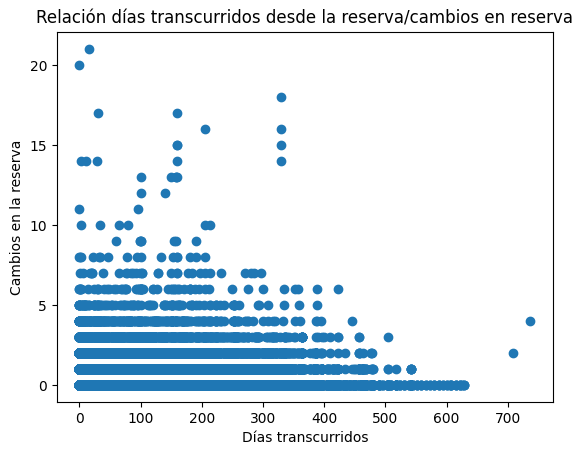

In [83]:
fig, ax = plt.subplots()
ax.scatter(dfn ['Días transcurridos'], dfn['Número de cambios en la reserva'])
ax.set_title('Relación días transcurridos desde la reserva/cambios en reserva')
ax.set_xlabel('Días transcurridos')
ax.set_ylabel('Cambios en la reserva')

Observamos que a medida que más días transcurren desde que se realizó la reserva menos son los cambios que solicitan los clientes.

Text(0.5, 0, 'Tipo de Hotel')

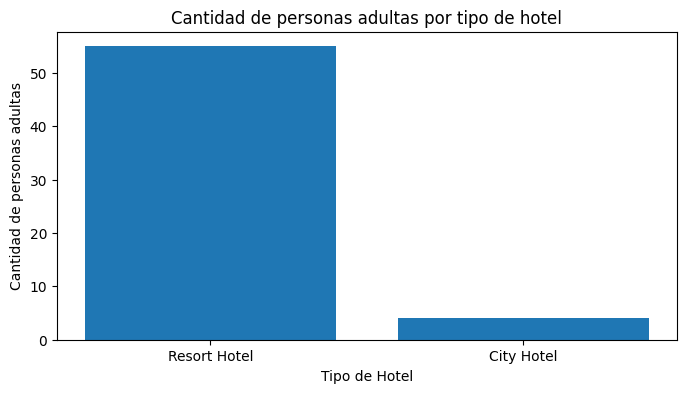

In [95]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(dfn['Tipo de Hotel'], dfn['Adultos'])
ax.set_title('Cantidad de personas adultas por tipo de hotel')
ax.set_ylabel('Cantidad de personas adultas')
ax.set_xlabel('Tipo de Hotel')

Aquí obrservamos que hay mayor prefeencia de personas adultas por los hoteles Resorts que hoteles en la Ciudad.

Text(0, 0.5, 'Cantidad de cancelaciones previas')

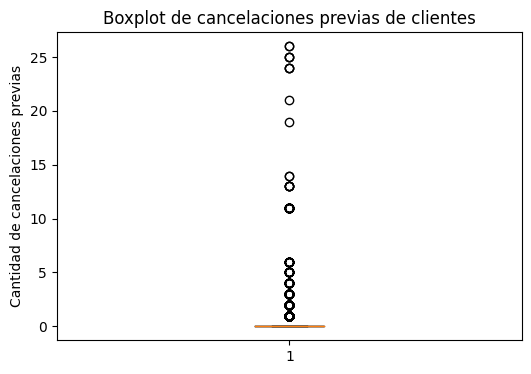

In [108]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(dfn['Cancelación previa'].T)
ax.set_title('Boxplot de cancelaciones previas de clientes')
ax.set_ylabel('Cantidad de cancelaciones previas')


Con este gráfico podemos demostrar que no es típico que los clientes cancelen sus reservas, aunque con valores outliers vemos que sí sucede.

Text(0, 0.5, 'Importe de la reserva')

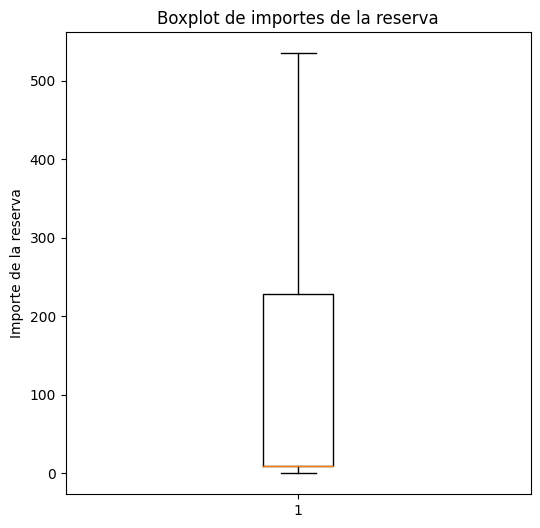

In [117]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot(dfn['Importe de la reserva'].T)
ax.set_title('Boxplot de importes de la reserva')
ax.set_ylabel('Importe de la reserva')

Vemos los importes habituales con los que se realizan las reservan y los valores atípicos (outliers).

In [119]:
import seaborn as sns

<Axes: xlabel='Tipo de reserva', ylabel='Count'>

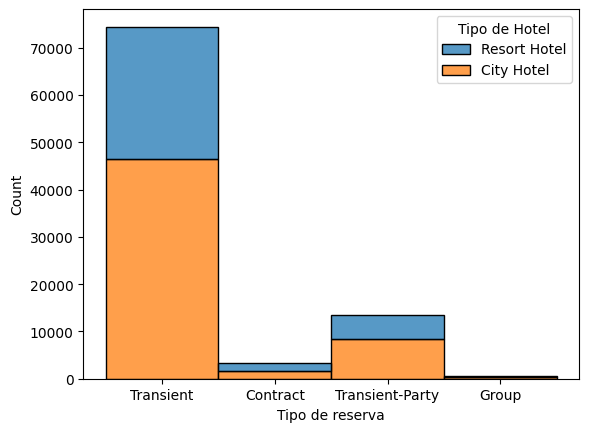

In [126]:
sns.histplot(data=dfn, x="Tipo de reserva", hue="Tipo de Hotel", multiple="stack")

Vemos la distribución de las cantidades de tipo de reservas por tipo de hotel.

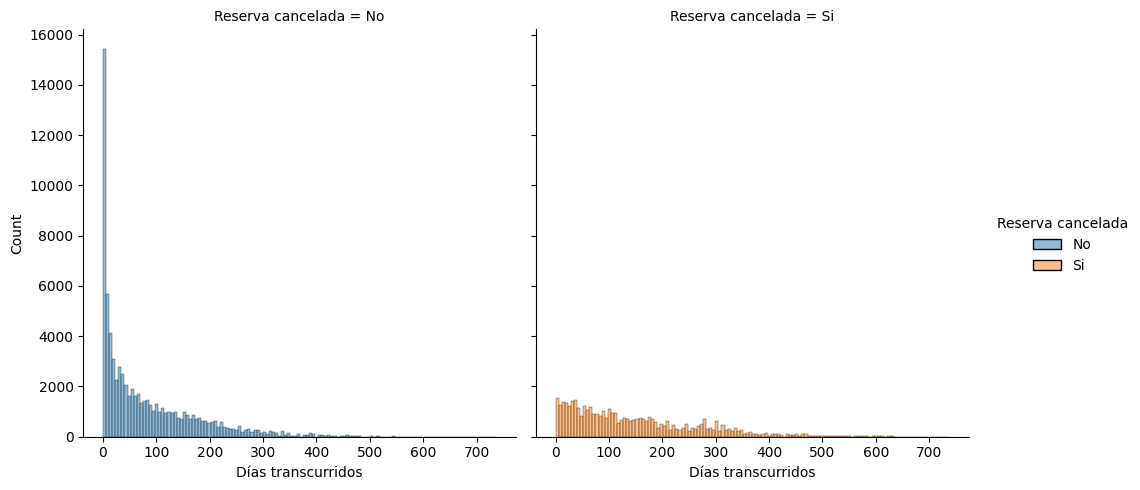

In [124]:
sns.displot(data=df, x="Días transcurridos", hue="Reserva cancelada", col="Reserva cancelada")

Observamos que, dentro de las cancelaciones (parte derecha del gráfico), mientras más días pasan desde que los clientes realizan la reserva de hospedaje, es menos probable que cancelen la misma.

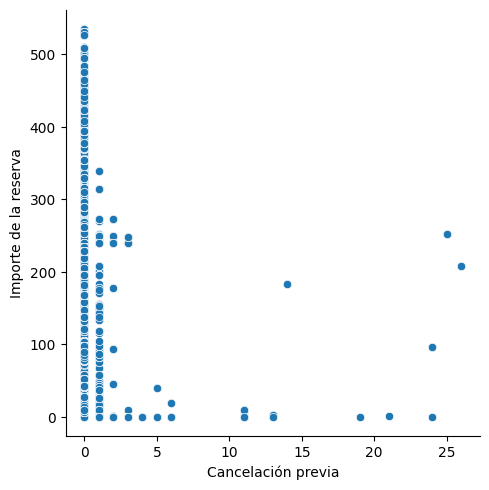

In [132]:
g = sns.relplot(data=dfn, x="Cancelación previa", y="Importe de la reserva")

Podemos apreciar que la mayoría de los clientes no tienen cancelaciones previas y otorgan mayores importes de reserva.